# Анализ данных интернет-магазина "Стримчик"

**Данные:** нам передали данные о продажах интернет-магазина "Стримчик". Доступны данные о названии игры, платформе, годе выхода, жанре, продажам в разных странах, рейтинг и оценки ползователей и критиков.

**Наша цель:** провести анализ данных и выявить определяющие успешность игры закономерности. Это позволит определить потенциально популярный продукт и спланировать рекламные кампании.

**Этапы работы:**
1. Изучить данные
2. Провести предобработку данных (устранить пропуски, дубликаты, моменять тип данных)
3. Провести исследовательский анализ данных
4. Составить макет игры для каждого региона.
5. Проверить гипотезы, чтобы создать потенциально популярный продукт и спланировать рекламные кампании.
6. Сделать выводы, определить параметры потенциально популярной игры.

## Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd# импортируйте библиотеку pandas
import matplotlib.pyplot as plt 
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')# прочитайте csv-файл

In [3]:
# информация о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Файл с данными открыт, заметим что названия столбцов не приведены к нижнему регистру, есть пропуски, типы данных некоторых столбцов неправильные. 

## Шаг 2. Подготовим данные

Заменим названия столбцов (приведем к нижнему регистру)

In [4]:
data.columns = data.columns.str.lower()

Преобразуем некорректные данные в нужные типы.

Изменяем тип данных в столбце рейтинг пользователя со сторчного на числовой с плавающей точкой.

In [5]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Заметим, что в столбце с оценкой пользователей есть аббревиатура 'tbd'. Она означает, что оценка будет сформирована позже. Метод coerce автоматически заменит 'tbd' на Nan.

Удалять пропуски в сталбцах critic_score, user_score мы не будем, так как потеряется значительный массив данных.

В столбце rating пропуски заменим на unknown, чтобы не потерять значительный массив данных.

In [6]:
data['rating'] = data['rating'].fillna('unknown')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [8]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Удалим пропуски в столбцах name и genre, так как их не восстановить и их всего 2 штуки

In [9]:
data = data.dropna(subset = ['name', 'genre'])

Проверим наличие явных дубликатов.

In [10]:
data.duplicated().sum()

0

Явных дубликатов нет

Проверим наличие неявных дубликатов.

In [11]:
data.duplicated(['name', 'platform', 'year_of_release']).sum()

1

Удалим этот дубликат

In [12]:
data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


Обновим индексы

In [13]:
data = data.reset_index(drop=True)

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец all_sales

In [14]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Причины появления пропусков:
- Пропуски могли возникнуть во время копирования, считывания или записи данных, изменения формата файла.
- Вызванные человеческим фактором. То есть возможно часть данных была введена человеком и он мог сделать ошибку. 
В нашем случае пропуски больше похожи на технологические.

Кроме того,  рейтинг ESRB - это рейтинг для США и Канады. А значит пропуск в столбце Rating не савязан с ошибкой заполнения данных, просто не только для Северной Америки выпускаются игры

## Шаг 3. Проведем исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

In [15]:
data['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

Данные за некоторые периоды не важны, так как они составляют менее 1,5% от общей выборки. Посчитаем эту цифру. Общее количество продаж - это 16715. 16715*0.015 = 250.725
Те года в которые вышло игр менее 250 не будем учитывать. Это года до 1996 года.

In [16]:
data = data.query('year_of_release >= 1996')

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построем распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы.

In [17]:
data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)
    

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,685.59
PS4,314.14
GBA,312.88
PSP,289.53


В качестве платформ с наибольшими продажами выберем платформы, сумма продаж игр на которых больше половины продаж наиболее продавемой платформы. Это платформы: PS2, X360, Wii, DS, PS.

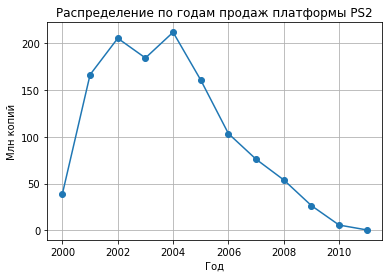

In [18]:
data.query('platform == "PS2"').groupby('year_of_release')['all_sales'].sum().plot(y='all_sales', style='-o', grid=True, xlabel='Год', ylabel='Млн копий' ,title='Распределение по годам продаж платформы PS2');

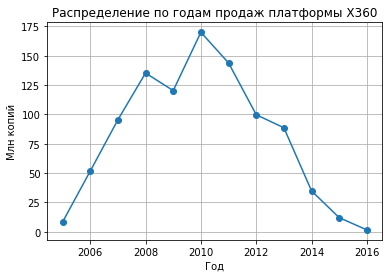

In [19]:
data.query('platform == "X360"').groupby('year_of_release')['all_sales'].sum().plot(y='all_sales', style='-o', grid=True, xlabel='Год', ylabel='Млн копий' ,title='Распределение по годам продаж платформы X360');

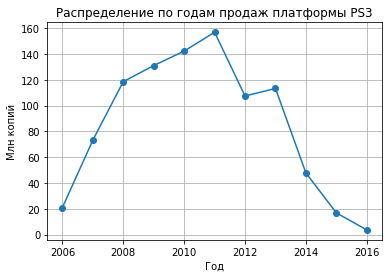

In [20]:
data.query('platform == "PS3"').groupby('year_of_release')['all_sales'].sum().plot(y='all_sales', style='-o', grid=True, xlabel='Год', ylabel='Млн копий' ,title='Распределение по годам продаж платформы PS3');

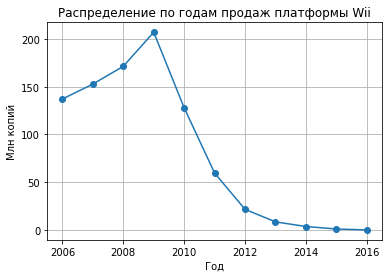

In [21]:
data.query('platform == "Wii"').groupby('year_of_release')['all_sales'].sum().plot(y='all_sales', style='-o', grid=True, xlabel='Год', ylabel='Млн копий' ,title='Распределение по годам продаж платформы Wii');

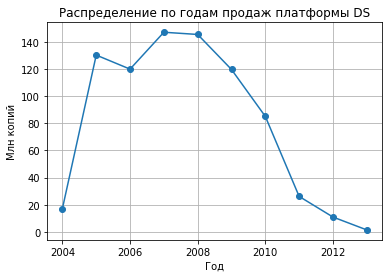

In [22]:
data.query('platform == "DS"').groupby('year_of_release')['all_sales'].sum().plot(y='all_sales', style='-o', grid=True, xlabel='Год', ylabel='Млн копий' ,title='Распределение по годам продаж платформы DS');

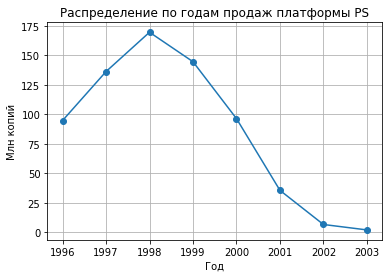

In [23]:
data.query('platform == "PS"').groupby('year_of_release')['all_sales'].sum().plot(y='all_sales', style='-o', grid=True, xlabel='Год', ylabel='Млн копий' ,title='Распределение по годам продаж платформы PS');

In [24]:
# Определим медианный срок жизни платформы
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Определим, какие платформы лидируют по продажам. Составим рейтинг по убыванию

In [25]:
df = data.query('year_of_release > 2013')
df.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)

,all_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Для прогнозирования продаж возьмем срок 3 года, так как за это время появляются новые платформы и исчезают старые. Таким образом мы будем иметь достаточно данных для прогнозирования и при этом не захватим отжившие тренды.

В расчете не будем учитывать платформы продажи игр на которых составляет менее 1,5% от общего числа продаж. Определим это число:

In [26]:
df['all_sales'].sum()*0.015

10.94175

Учитываем только платформы: 
- PS4
- XOne
- 3DS
- PS3
- X360
- WiiU
- PC
- PSV

Построим графики продаж на этих платформах по годам.

Построим графики распределения продаж по годам на выбранных платформах за последние 3 года.
(При этом будем строить графики внутри цикла, а не каждый по отдельности, как было в первом варианте)

AxesSubplot(0.125,0.125;0.775x0.755)


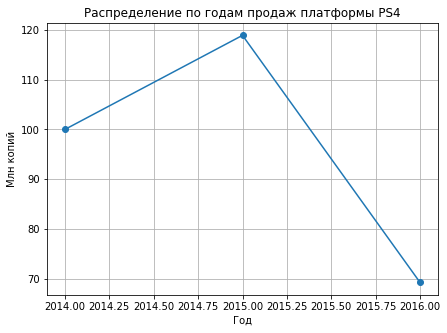

AxesSubplot(0.125,0.125;0.775x0.755)


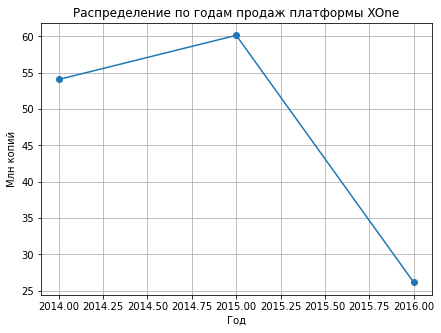

AxesSubplot(0.125,0.125;0.775x0.755)


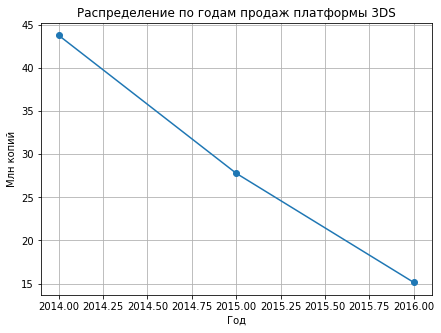

AxesSubplot(0.125,0.125;0.775x0.755)


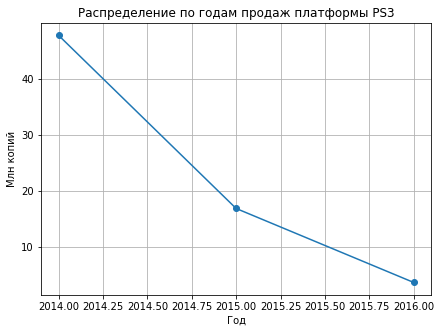

AxesSubplot(0.125,0.125;0.775x0.755)


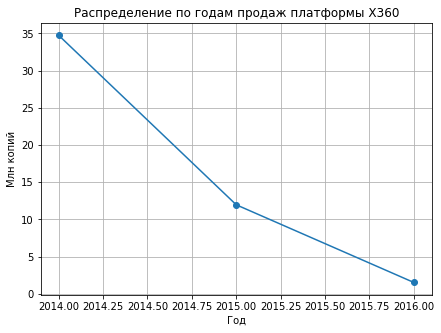

AxesSubplot(0.125,0.125;0.775x0.755)


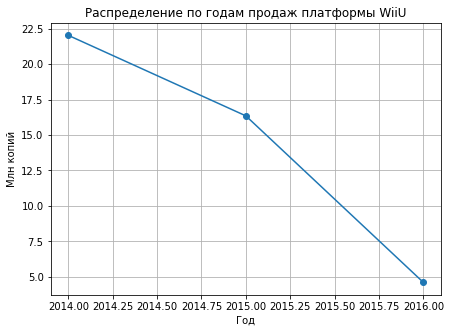

AxesSubplot(0.125,0.125;0.775x0.755)


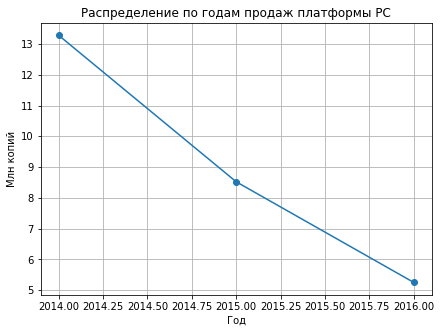

AxesSubplot(0.125,0.125;0.775x0.755)


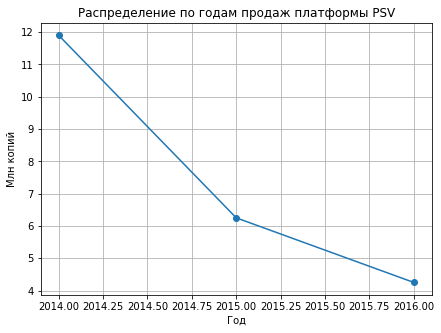

In [27]:
for platform in ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV']:
    data_graph=df[df['platform'] == platform].groupby('year_of_release')['all_sales'].sum().plot(y='all_sales', style='-o', grid=True, xlabel='Год', ylabel='Млн копий' ,title=(f"Распределение по годам продаж платформы {platform}"), figsize=(7, 5))
    print(data_graph)
    plt.show();

По графикам видно, что графики продаж платформ 3DS, PS3, X360, WiiU, PC, PSV идут на спад. Поэтому в качестве потенциально прибыльных платформ выбраны PS4, XOne. Графики данных платформ до 2015 стабильно растут, поскольку по заданию сейчас декабрь 2016 года, данные за 2016 год не полные.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам PS4, XOne, 3DS, PS3, X360, WiiU, PC, PSV. Опишем результаты.

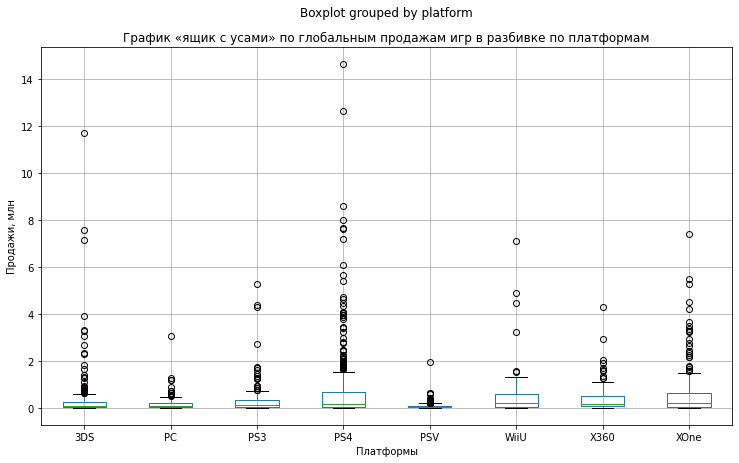

In [28]:
db= df.query('platform == ["PS4", "XOne", "3DS", "PS3", "X360", "WiiU", "PC", "PSV"]')
dbb = db.boxplot(column='all_sales', by='platform', grid=True, figsize=(12, 7));
dbb.set_title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
dbb.set_xlabel('Платформы');
dbb.set_ylabel('Продажи, млн');

Построим этот же график, но с увеличенным масштабом

(0.0, 1.15)

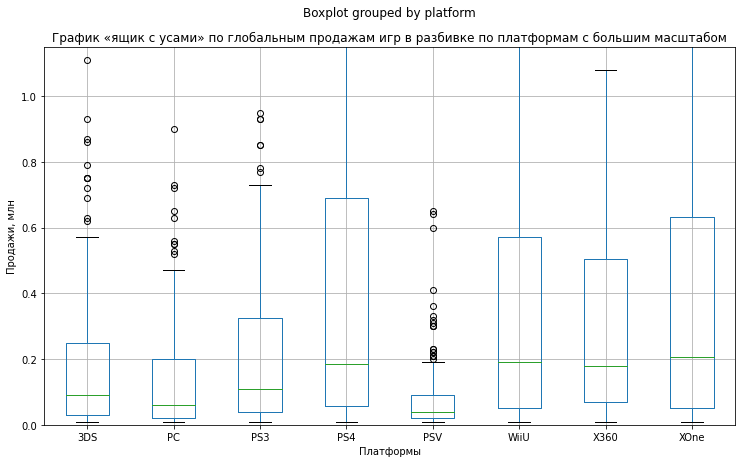

In [29]:
db = df.query('platform == ["PS4", "XOne", "3DS", "PS3", "X360", "WiiU", "PC", "PSV"]')
db_b = db.boxplot(column='all_sales', by='platform', grid=True, figsize=(12, 7));
db_b.set_title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам с большим масштабом')
db_b.set_xlabel('Платформы');
db_b.set_ylabel('Продажи, млн');
plt.ylim(0, 1.15)

По графикам видно, что у платформ, которые набирают популярность (PS4 и XOne) амплитуды выбросов одни из самых больших. При этом, у платформ набирающих популярность (PS4 и XOne) и у платформ, которые были наиболее популярны за последние 3 года (WiiU и X360) близкое медианное значение продаж - 0,2 млн. По мере снижения популярности, медианное значение падает.
Кроме того, у набирающих популятность платформ (PS4 и XOne) наибольшие межквартильные размахи.

Посмотрим, как влияют на продажи отзывы пользователей и критиков на всех платформах. Построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами. Для удобства сравнения коэф. корреляции создадим таблицу.

Платформа: PS4
Коэффициент корреляции между отзывами критиков и продажами платформы: PS4 0.4
Коэффициент корреляции между отзывами пользователей и продажами платформы: PS4 -0.04


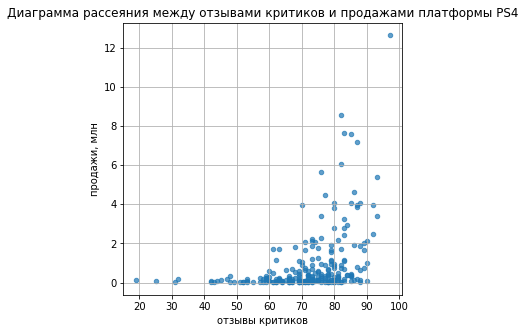

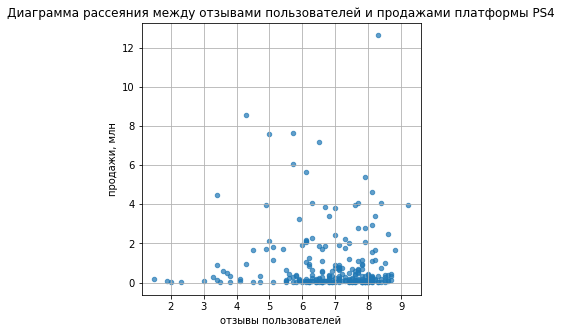


Платформа: XOne
Коэффициент корреляции между отзывами критиков и продажами платформы: XOne 0.43
Коэффициент корреляции между отзывами пользователей и продажами платформы: XOne -0.07


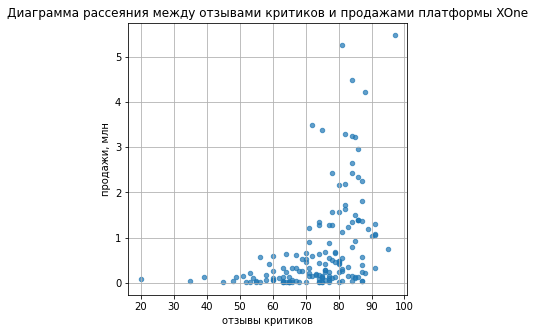

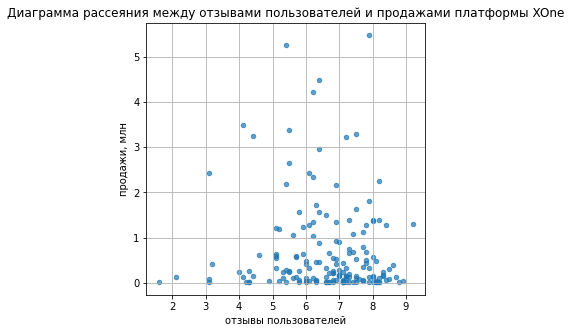


Платформа: 3DS
Коэффициент корреляции между отзывами критиков и продажами платформы: 3DS 0.31
Коэффициент корреляции между отзывами пользователей и продажами платформы: 3DS 0.22


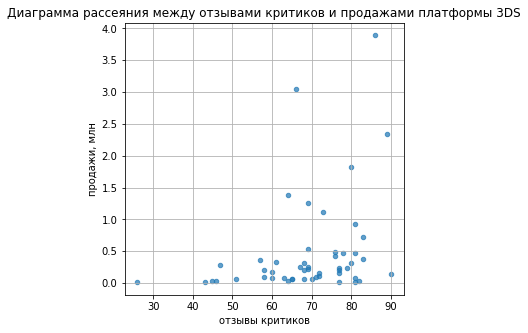

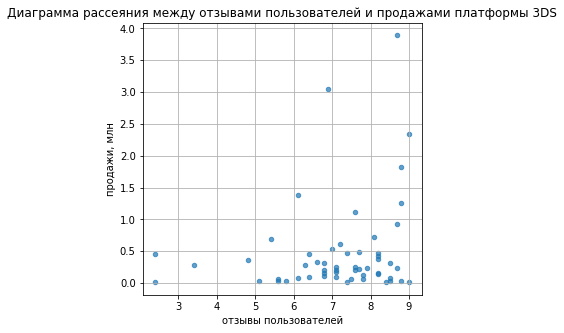


Платформа: PS3
Коэффициент корреляции между отзывами критиков и продажами платформы: PS3 0.45
Коэффициент корреляции между отзывами пользователей и продажами платформы: PS3 -0.17


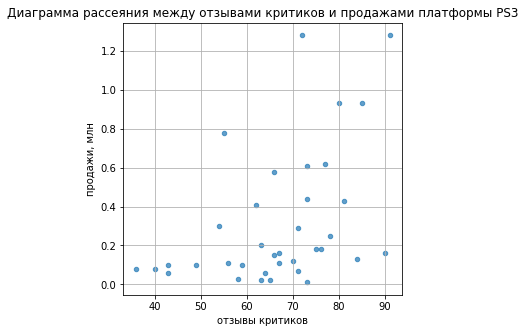

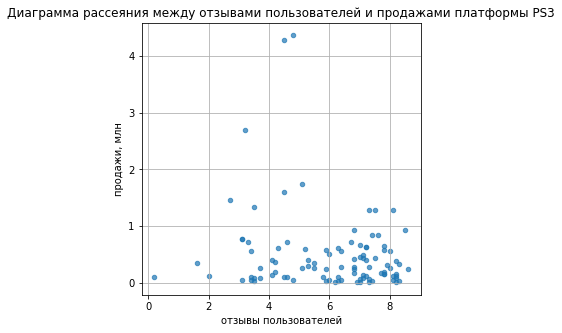


Платформа: X360
Коэффициент корреляции между отзывами критиков и продажами платформы: X360 0.53
Коэффициент корреляции между отзывами пользователей и продажами платформы: X360 -0.14


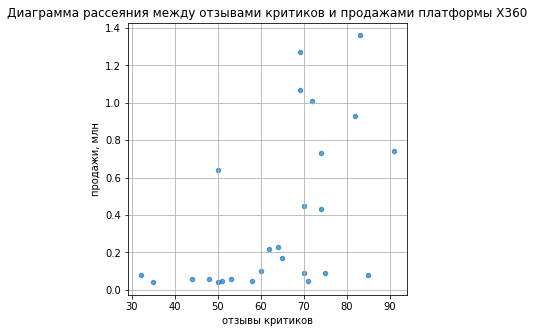

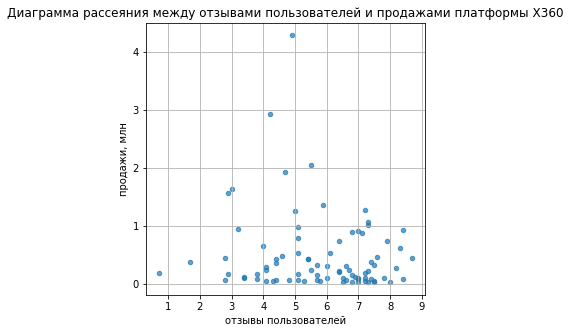


Платформа: WiiU
Коэффициент корреляции между отзывами критиков и продажами платформы: WiiU 0.37
Коэффициент корреляции между отзывами пользователей и продажами платформы: WiiU 0.41


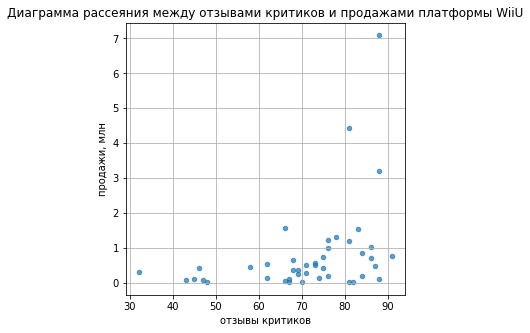

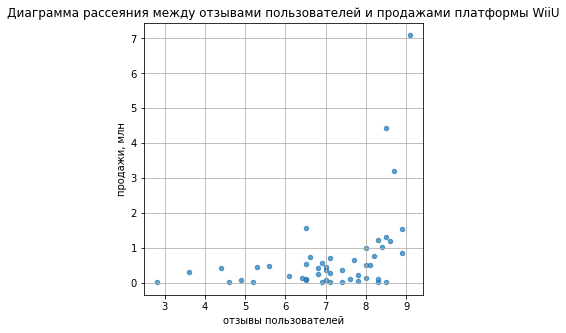


Платформа: PC
Коэффициент корреляции между отзывами критиков и продажами платформы: PC 0.17
Коэффициент корреляции между отзывами пользователей и продажами платформы: PC -0.07


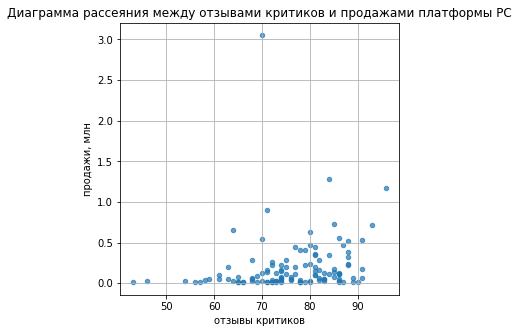

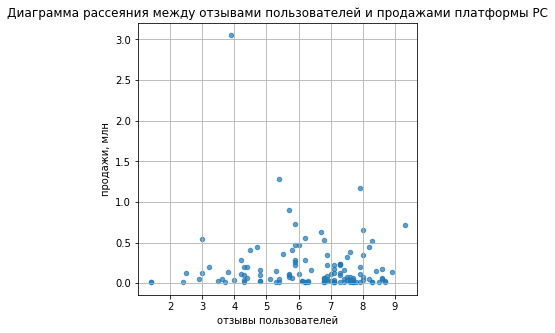


Платформа: PSV
Коэффициент корреляции между отзывами критиков и продажами платформы: PSV 0.04
Коэффициент корреляции между отзывами пользователей и продажами платформы: PSV -0.17


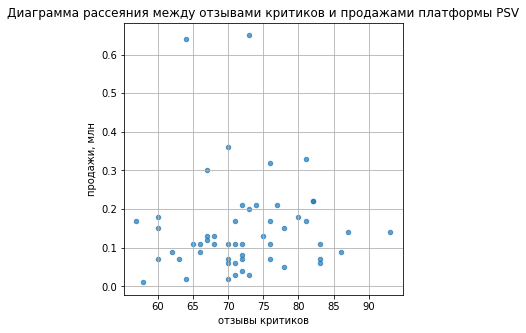

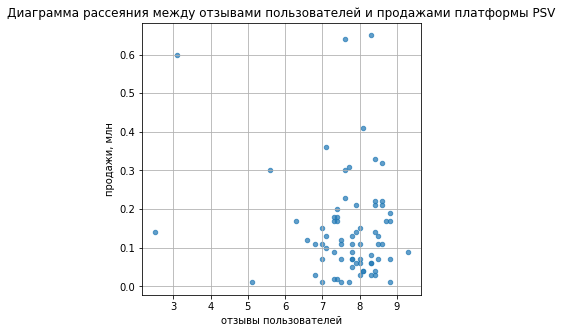


  Платформа  Коэф. корр. критиков  Коэф. корр. пользователей
0       PS4                  0.40                      -0.04
1      XOne                  0.43                      -0.07
2       3DS                  0.31                       0.22
3       PS3                  0.45                      -0.17
4      X360                  0.53                      -0.14
5      WiiU                  0.37                       0.41
6        PC                  0.17                      -0.07
7       PSV                  0.04                      -0.17


In [30]:
table_gl = []
for platform in ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV']:
    
    table = []
    data_graph=df[df['platform'] == platform]
    print(f"Платформа: {platform}")
    table.append(platform)
    
    data_graph.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.7, figsize=(5, 5), sharex=False, grid=True, title=(f"Диаграмма рассеяния между отзывами критиков и продажами платформы {platform}"), xlabel = 'отзывы критиков', ylabel='продажи, млн')
    kc = data_graph['critic_score'].corr(data_graph['all_sales']).round(2)
    print(f"Коэффициент корреляции между отзывами критиков и продажами платформы: {platform}", kc)
    table.append(kc)
    
    data_graph.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.7, figsize=(5, 5), sharex=False, grid=True, title=(f"Диаграмма рассеяния между отзывами пользователей и продажами платформы {platform}"), xlabel = 'отзывы пользователей', ylabel='продажи, млн')
    ku = data_graph['user_score'].corr(data_graph['all_sales']).round(2)
    print(f"Коэффициент корреляции между отзывами пользователей и продажами платформы: {platform}", ku)
    plt.show()
    print()
    
    table.append(ku)
    table_gl.append(table)
    #print(table_gl)
entries = ['Платформа','Коэф. корр. критиков', 'Коэф. корр. пользователей']
table_corr = pd.DataFrame(data=table_gl, columns=entries)
print(table_corr)

По графикам и из таблицы видно, что за исключением PSV и PC существует зависимость между оценками критиков и продажами (Коэф. корр. 0,31-0,53). Оценки пользователей по разному влиют на продажи. Так для платформ PS4, XOne, PC оценки пользователей не влияют на продажи (Коэф. корр. -0,07-(-0,04)). Для платформ PS3 и PSV существует небольшая обратная зависимость (Коэф. корр. -0,17). Для платформы 3DS небольшая прямая зависимость (Коэф. корр. 0,22), а для платформы WiiU сравнительно существенная прямая зависимость (Коэф. корр. 0,41).

Посмотрим на общее распределение игр по жанрам. Определим, выделяются ли жанры с высокими и низкими продажами.

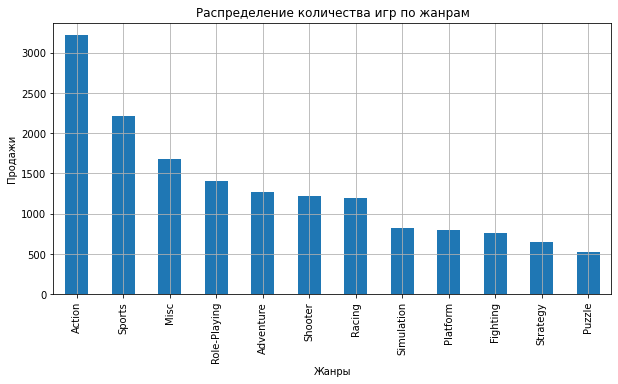

In [31]:
data['genre'].value_counts().plot(y='all_sales', kind='bar', grid=True, figsize=(10, 5), title='Распределение количества игр по жанрам', xlabel='Жанры', ylabel='Продажи');

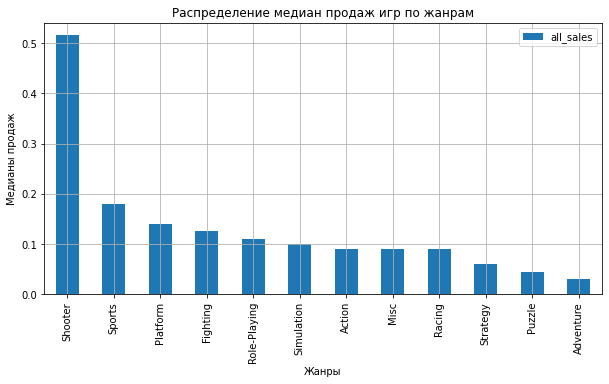

In [32]:
df.pivot_table(index='genre', values='all_sales', aggfunc='median').sort_values(by='all_sales', ascending=False).plot(y='all_sales', kind='bar', grid=True, figsize=(10, 5), title='Распределение медиан продаж игр по жанрам', xlabel='Жанры', ylabel='Медианы продаж');

Для расширения бизнеса нужны стабильные жанры, который приносят доход не зависимо от платформы. Из этого следует, что общие продажи по жанрам смотреть нет смысла - ведь если одна игра сверхпопулярна, то это отразится на всем жанре. Поэтому лучше посмотреть распределение медианных продаж по жанрам. Так мы сможем выявить стабильные жанры, которые приносят доход. Для этого построим диаграммы размаха для всех жанров.

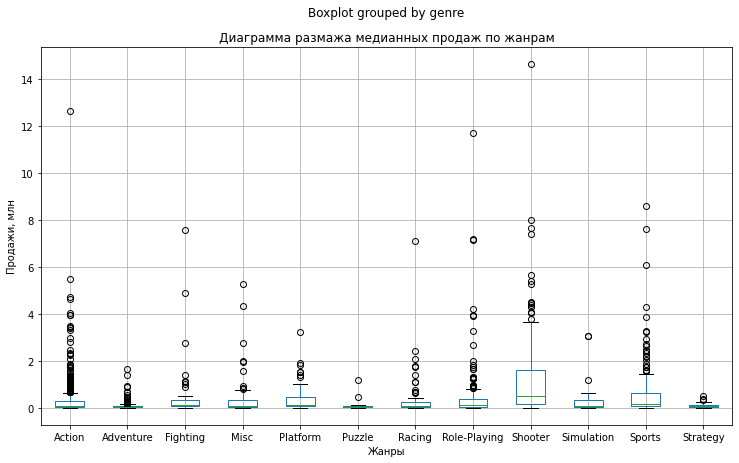

In [33]:
dbb = df.boxplot(column='all_sales', by='genre', grid=True, figsize=(12, 7));
dbb.set_title('Диаграмма размажа медианных продаж по жанрам')
dbb.set_xlabel('Жанры');
dbb.set_ylabel('Продажи, млн');

Построим этот же график, но в увеличенном масштабе

(0.0, 1.0)

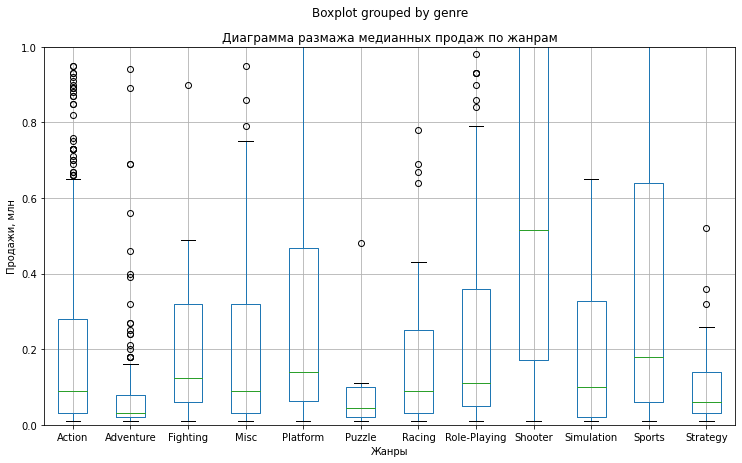

In [34]:
dbb = df.boxplot(column='all_sales', by='genre', grid=True, figsize=(12, 7));
dbb.set_title('Диаграмма размажа медианных продаж по жанрам')
dbb.set_xlabel('Жанры');
dbb.set_ylabel('Продажи, млн');
plt.ylim(0, 1)

Наиболее продаваемыми жанрами игр являются Action, Sports, Misc. Диграмма по медианному значению продаж в зависимости от жанров показывает, что по этому показателю лидирует жанр Shooter. Построив диаграммы размаха видим, что в лидирующих жанрах большое число выбросов, которые приводят к большому росту общих продаж. Для определения наиболее прибыльного жанра лучше пользоваться межквартильным размахом. Таким образом наиболее прибыльным можно назвать жанр Shooter.

## Шаг 4. Составьте портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе

**Самые популярные платформы (топ-5). Опишем различия в долях продаж.**

Используем данные только за актуальный период (3 года)

AxesSubplot(0.260833,0.125;0.503333x0.755)


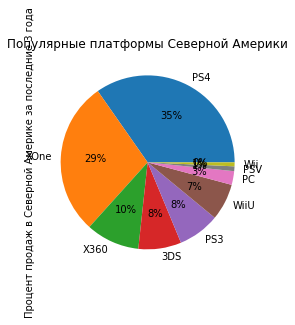

AxesSubplot(0.260833,0.125;0.503333x0.755)


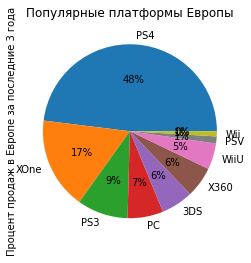

AxesSubplot(0.260833,0.125;0.503333x0.755)


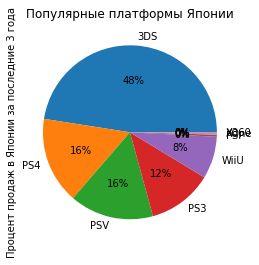

AxesSubplot(0.260833,0.125;0.503333x0.755)


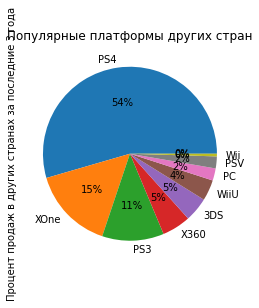

In [35]:
print(df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.0f%%', title = 'Популярные платформы Северной Америки', label = 'Процент продаж в Северной Америке за последние 3 года'));
plt.show()
print(df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.0f%%', title = 'Популярные платформы Европы', label = 'Процент продаж в Европе за последние 3 года'));
plt.show()
print(df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.0f%%', title = 'Популярные платформы Японии', label = 'Процент продаж в Японии за последние 3 года'));
plt.show()
print(df.groupby('platform')['other_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.0f%%', title = 'Популярные платформы других стран', label = 'Процент продаж в других странах за последние 3 года'));

**Самые популярные жанры (топ-5)**

AxesSubplot(0.260833,0.125;0.503333x0.755)


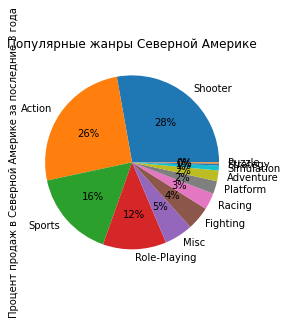

AxesSubplot(0.260833,0.125;0.503333x0.755)


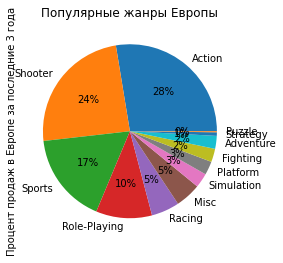

AxesSubplot(0.260833,0.125;0.503333x0.755)


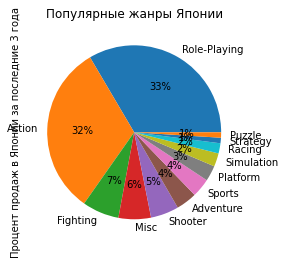

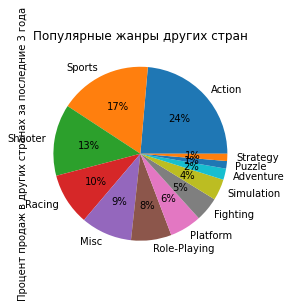

In [36]:
print(df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.0f%%', title = 'Популярные жанры Северной Америке', label = 'Процент продаж в Северной Америке за последние 3 года'));
plt.show()
print(df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.0f%%', title = 'Популярные жанры Европы', label = 'Процент продаж в Европе за последние 3 года'));
plt.show()
print(df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.0f%%', title = 'Популярные жанры Японии', label = 'Процент продаж в Японии за последние 3 года'));
plt.show()
data.groupby('genre')['other_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.0f%%', title = 'Популярные жанры других стран', label = 'Процент продаж в других странах за последние 3 года');

Самыми популярными платформами по продажам во всех регионах, кроме Японии, являются PS4 (35-54%) и XOne (15-29%), в Японии самой популярной платформой является 3DS (48%), следом идут PS4 и PSV (16%).
    
Доли продаж жанра Action во всех регионах, кроме Японии, на высоком уровне и составляют 24-28%, доли продаж жанра Shooter, так же во всех странах кроме Японии, на высоком уровне и составляют 13-28%. Наиболее популярный жанр в Японии - Role-Playing с 33%, на втором месте для этого региона жанр Action с 32%.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

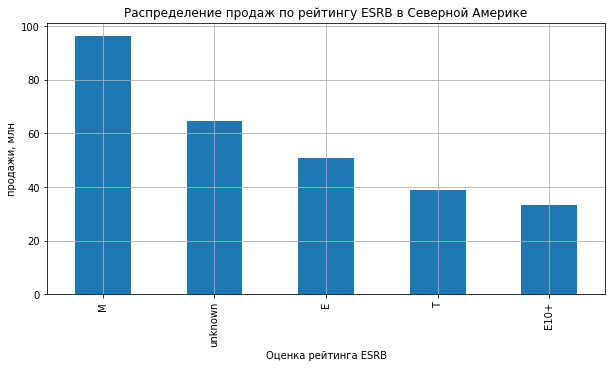

In [37]:
df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(y='na_sales', kind='bar', grid=True, figsize=(10, 5), title='Распределение продаж по рейтингу ESRB в Северной Америке', xlabel='Оценка рейтинга ESRB', ylabel='продажи, млн');

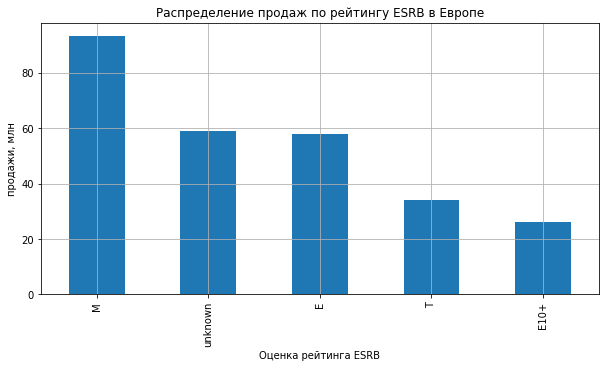

In [38]:
df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(y='eu_sales', kind='bar', grid=True, figsize=(10, 5), title='Распределение продаж по рейтингу ESRB в Европе', xlabel='Оценка рейтинга ESRB', ylabel='продажи, млн');

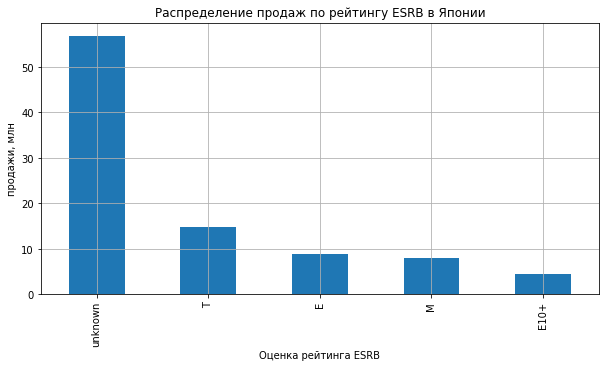

In [39]:
df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(y='jp_sales', kind='bar', grid=True, figsize=(10, 5), title='Распределение продаж по рейтингу ESRB в Японии', xlabel='Оценка рейтинга ESRB', ylabel='продажи, млн');

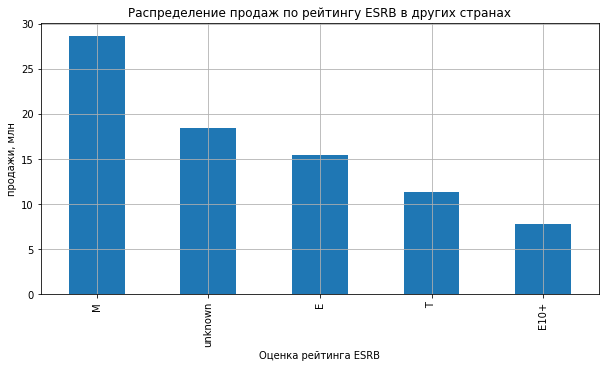

In [40]:
df.groupby('rating')['other_sales'].sum().sort_values(ascending=False).plot(y='other_sales', kind='bar', grid=True, figsize=(10, 5), title='Распределение продаж по рейтингу ESRB в других странах', xlabel='Оценка рейтинга ESRB', ylabel='продажи, млн');

Из графиков видно, что в регионах,  за исключением Японии, наиболее продаваемыми играми, за последние  3 года, являются игры категории "М", что значит для взрослых. В Японии лидирует неуказанная категория, что может служить выводом о том, что наиболее  распространены игры, выпущенные не в Северной Америке. Данных по рейтингам других стран в датасете нет.

## Шаг 5. Проверим гипотезы

**1. Сначала проверим гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

In [41]:
pc = df.query('platform == "PC"')['user_score'].dropna() #пользовательский рейтинг PC, с помощью dropna() удалили пропуски
xone = df.query('platform == "XOne"')['user_score'].dropna() #пользовательский рейтинг XOne

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза: пользовательские рейтинги платформ Xbox One и PC разные. 

Зададим двусторонюю альтернативную гипотезу, так как некоторые игры (Dota2  и CS например) подходят только для PC и играть на них на консоли без клавиатуры просто невозможно. С другой стороны консоль Xbox One тоже очень популярна. Поэтому сходу предположить, что какая то из платформ популярнее нет возможности.

Зададим уровень статической значимости 0,05% как стандартное число.

Для проверки такой гипотезы понадобится статистический тест, в котором проверяется двусторонняя гипотеза, чтобы сравнить средние двух генеральных совокупностей между собой.
Используем статистический тест t-test, так как t-test возвращает p-value. А p-value - это вероятность получить наблюдаемый или ещё более далекий от предполагаемого результат при условии, что нулевая гипотеза верна.

In [42]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(pc, xone)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value (0.10450507919348415) выше заданного уровня значимости, поэтому не получилось отвергнуть нулевую гипотезу. **Есть основания говорить, что пользовательские рейтинги платформ Xbox One и PC похожи.**


**2. Теперь проверим гипотезу о том, что Средние пользовательские рейтинги жанров Action и Sports равны.**

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны. Альтернативная гипотеза: пользовательские рейтинг жанров не равны.

Зададим двусторонюю альтернативную гипотезу, так как невозможно заранее предположить какой из пользовательских рейтингов больше. Зададим уровень статической значимости 0,05% как стандартное число.

In [43]:
action = df.query('genre == "Action"')['user_score'].dropna() #пользовательский рейтинг Action, с помощью dropna() удалили пропуски
sports = df.query('genre == "Sports"')['user_score'].dropna() #пользовательский рейтинг Sports

In [44]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(action, sports, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4355573992552932e-19
Отвергаем нулевую гипотезу


Полученное значение p-value (1.4355573992552932e-19) значительно меньше заданного уровня значимости, поэтому мы отвергаем нулевую гипотезу. Есть основания говорить, что пользовательские рейтинги жанров Action и Sports отличаются.

## Выводы

Нам передали данные о продажах интернет-магазина "Стримчик". Были доступны данные о названии игры, платформе, годе выхода, жанре, продажам в разных странах, рейтинг и оценки ползователей и критиков.
    
**Ход работы:**    
1. Мы **проанализировали данные**
2. Сделали **предобработку данных** (устранили пропуски, дубликаты, привели название столбцов к змеиному регистру, поменяли тип данных.)
3. Провели **исследовательский анализ данных** и выявили, что средний срок использования платформы 3 года. Исходя из этого был выбран актуальный период для анализа: 2013-2016 годы. По данным за эти годы было выявлено, что для платформ PS4, XOne наблюдается рост продаж. Определили, что между отзывами критиков и продажами есть слабая связь (коэф. корр. примерно 0,4), а вот связь между отзывами пользователей и продажами практически отсутствует.
4. В целом **больше всего продаж у жанров игр Action  и Sports**, однако при изучении медианных значений и диаграмм размаха установили, что данные игры имеют большие продажи благожоря некоторым особо популярным релизам. Пользуясь межквартильным размахом установили, что **наиболее прибыльный жанр Shooter**.   
5. Кроме того, мы составили **портреты пользователей** по разным странам.
Пользователи в Северной Америке, Европе и других странах предпочитают следующие жанры: Action, Sports, Shooter. Только в Японии другие жанры: Role-playing, Action, Fighting. Пользоватлеи большинства стран, кроме Японии, прдепочитают игры категории "M" для взрослых, в Японии максимальные показатели у неопределенной категории, это говорит о том, что в Японии не популярны игры выпущенные в США и Канаде, а также отсутсвием рейтинга других стран.
6. Также мы **проверили гипотезы** и установили, что:
- Есть основания говорить, что пользовательские рейтинги платформ Xbox One и PC похожи.
- Есть основания говорить, что пользовательские рейтинги жанров Action и Sports разные.
    
    
**Рекламный бюджет следует потратить на игры для платформ  PS4 и XOne в жанре Shooter, рекламировать игру целесообразно во всех регионах, кроме Японии, при этом игра должна иметь положительные отзывы от критиков и игра должна быть для взрослых (с рейтингом "М").**